# *Bike Sharing Assignment*
---

# *Business Context*

1) Bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic
2) The company is finding it very difficult to sustain in the current market scenario
3) Business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end
4) BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19
5) It will be used by the management to understand how exactly the demands vary with different features.


# *Business Goal*

1) Required to model the demand for shared bikes with the available independent variables.
2) It will be used by the management to understand how exactly the demands vary with different features.
3) They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
4) The model should be built taking this 'cnt' as the target variable
5) It will be used by the management to understand how exactly the demands vary with different features.


---

### Common definitions

In [1]:
#Function to build a model using statsmodel api
def build_model(X, y, cols):
    # add constants for stats opdel
    X_sm = sm.add_constant(X[cols])
    lm = sm.OLS(y, X_sm).fit()
    print(lm.summary())

    # return values that will be used later
    return lm, X[cols], X_sm

In [2]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = df_boombikes_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [3]:
def create_subplots(df, list_var):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    #convert a multi-dimensional array of axes into a one-dimensional array.
    axes = axes.flatten()
    
    # Plot each variable on a separate subplot
    for index, item in enumerate(list_var):
        plot_barChart(fig, axes[index], df_boombikes[item], df_boombikes['casual'], df_boombikes['registered'], item, 'Count', f'Counts by {item} and User Type')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

In [4]:
def plot_barChart(fig, ax, x_col, y_col1, y_col2, x_label=None, y_label=None, title=None):
    # Set the position of the bars on the x-axis
    x = x_col

    # Set the width of the bar
    bar_width = 0.2

    # Plotting the bars
    bar1 = ax.bar(x - bar_width/2, y_col1, bar_width, label=y_col1.name)
    bar2 = ax.bar(x + bar_width/2, y_col2, bar_width, label=y_col2.name)

    # Add some text for labels, title, and axes ticks if passed in argument
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:   
        ax.set_ylabel(y_label)
    if title:
        ax.set_title(title)

    ax.set_xticks(x)
    ax.legend()

In [5]:
def plot_scatterChart (df, x_col, y_col, title, x_label, y_label : str = None):
    plt.figure(figsize=(6,5))

    # Set the title
    plt.title(title)

    # To visiualize scatter plot with regression line
    sns.regplot(data=df,y=y_col,x=x_col)
    plt.xlabel(x_label)
    plt.show()

## Step 1: Importing and Understanding data

#### Import requird packages 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read and understand the data

In [7]:
# Read the data, no need to explicity mention header row
df_boombikes = pd.read_csv("./dataset/day.csv")

In [8]:
df_boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df_boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Understand gaps in data

In [10]:
# check for NaN values
round(100*df_boombikes.isnull().sum()/len(df_boombikes.index),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

No null records

In [11]:
# Find out columns having only one value for all rows. This makes it as irrelevant for analysis
only_one_value_columns_list = []
for i in df_boombikes.columns:
    if df_boombikes[i].nunique() == 1:
        only_one_value_columns_list.append(i)

only_one_value_columns_list

[]

There are no columns having a unique records

In [12]:
# check for duplicate rows
df_boombikes[df_boombikes.duplicated()].shape

(0, 16)

There are no duplicate records

## Step 2: Visualising the Data

Visualise Boombike data using `matplotlib` and `seaborn`.

#### Visualising the Data - numeric variables

In [13]:
num_vars = ['cnt', 'temp', 'atemp', 'hum','windspeed']

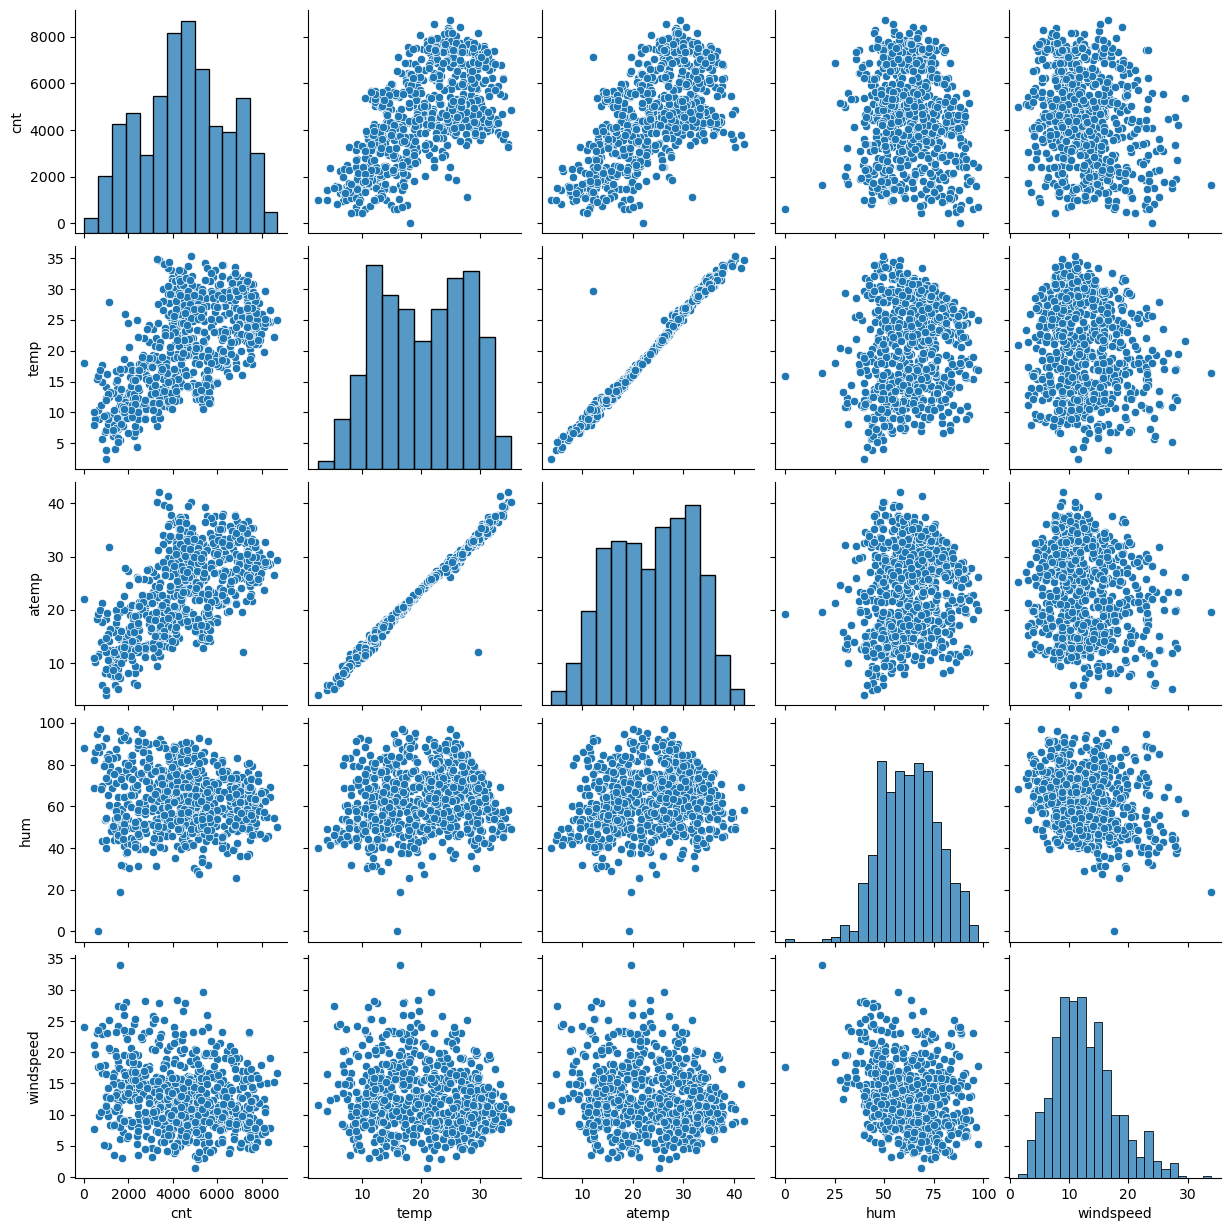

In [14]:
sns.pairplot(data = df_boombikes, vars=num_vars)
plt.show()

Independent variables such as atemp , temp shows a positive correlation with the target variable cnt . A Linear model can be considered in this case

#### Visualising the Data - Categorical Variables

In [15]:
categorical_vars = ['mnth', 'season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']

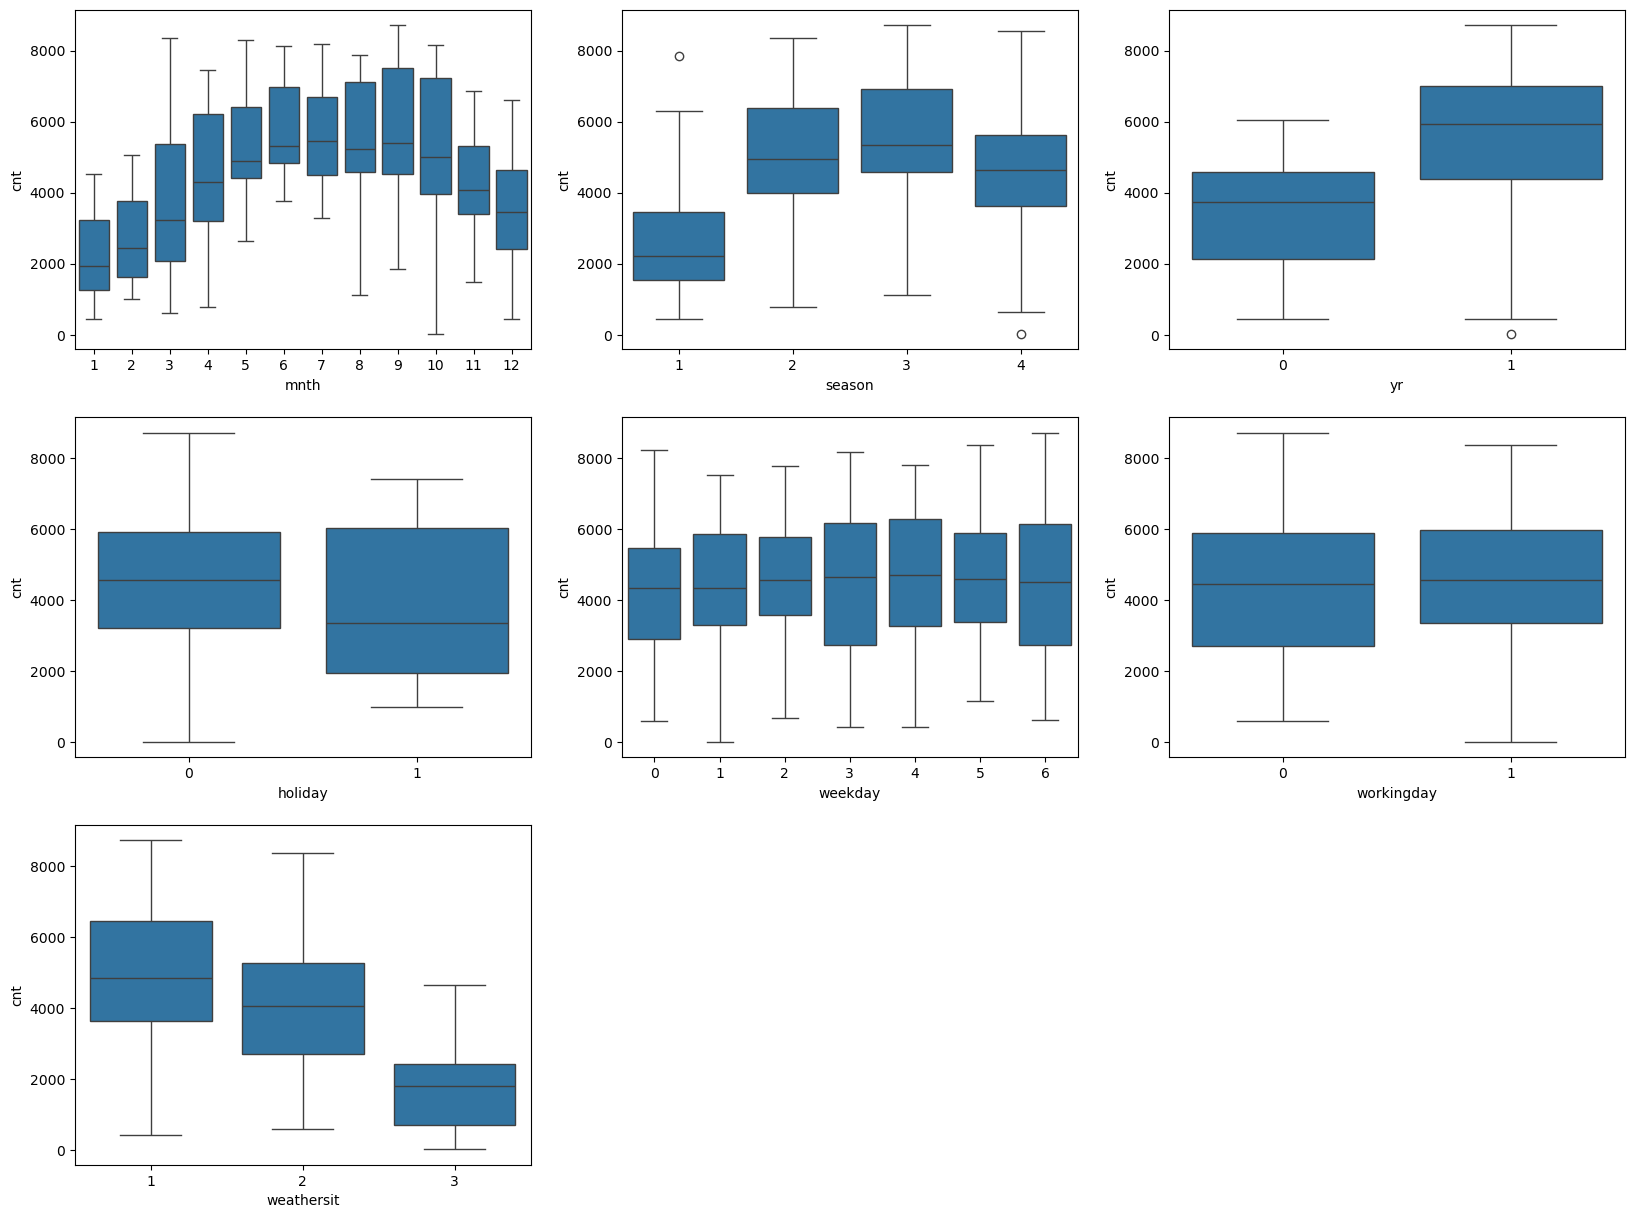

In [16]:
plt.figure(figsize=(20, 15))
for index, item in enumerate(categorical_vars):
    plt.subplot(3,3,(index+1))
    sns.boxplot(x = item, y = 'cnt', data = df_boombikes)

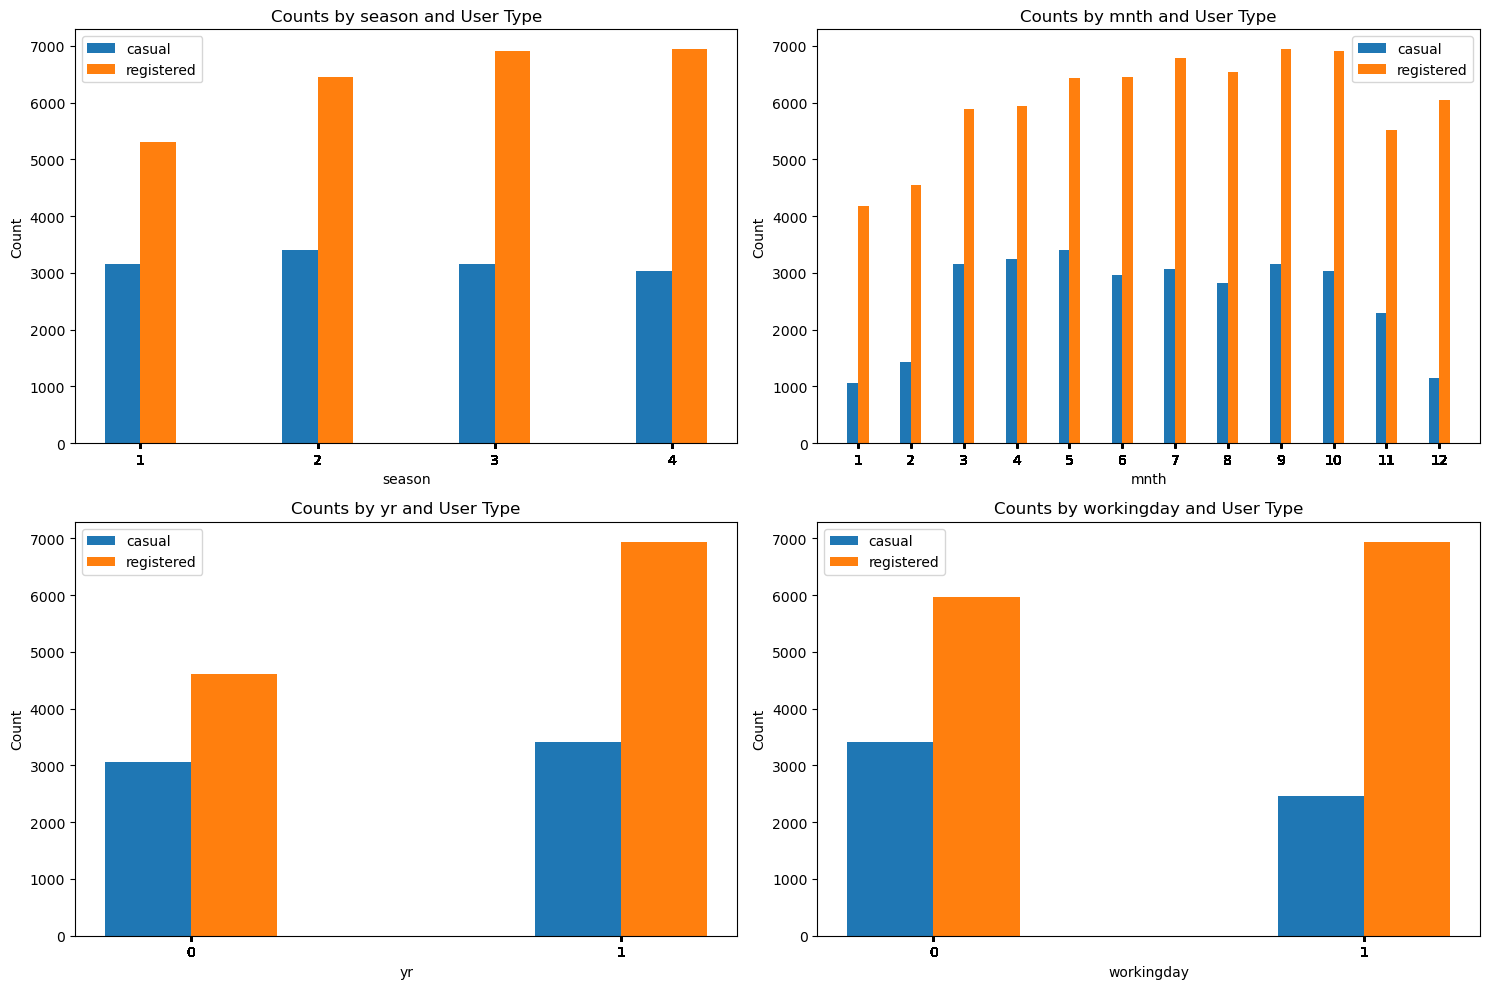

In [17]:
list_var = ['season', 'mnth', 'yr', 'workingday']
create_subplots(df_boombikes, list_var)

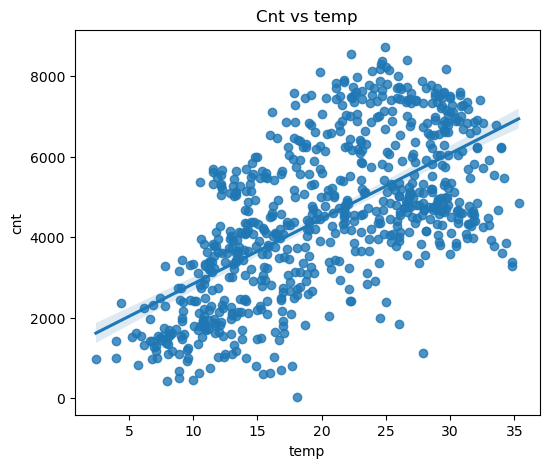

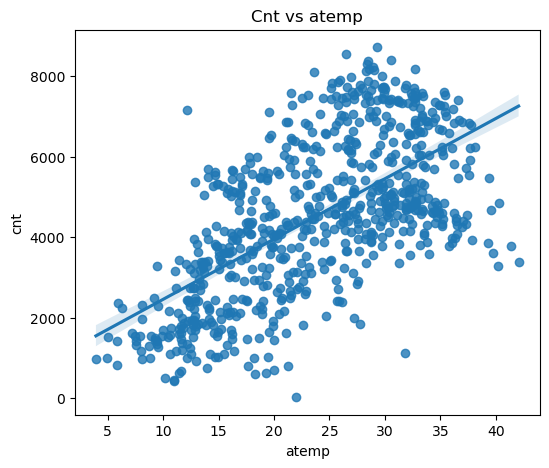

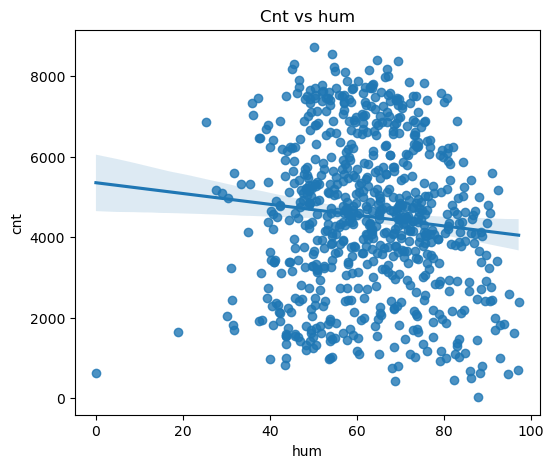

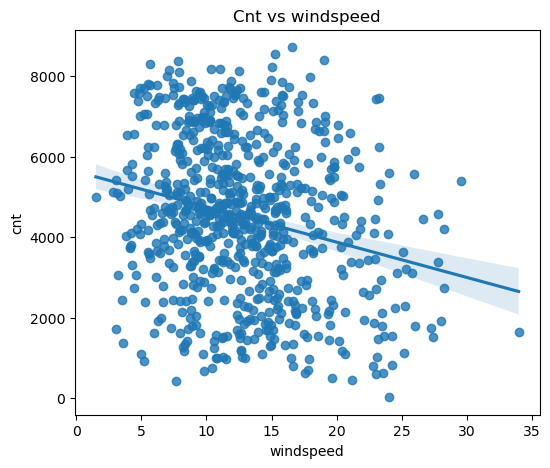

In [18]:
scatter_vars = ['temp', 'atemp', 'hum', 'windspeed']
for index, item in enumerate(scatter_vars):
    plot_scatterChart (df_boombikes, item, 'cnt', f'Cnt vs {item}', item, '')

## Data Obersations
1) There are 730 recoeds across 16 columns
2) No null records
3) Nu duplicate records
4) instant column is an index value of record number that can be dropped or can be made as default index
5) dteday column is not required since dataset is already having year (yr) and month (mnth). dteday can be converted to Quater wise data, however we already habe month wise data hence not considered
6) No column with single value

## Data point Inference
1) Independent variables such as atemp , temp shows a positive correlation with the target variable cnt
2) Lowest bike rental count is for month 10 i.e. October.
3) Highest bike rental count is for month 9 i.e. September.
4) Median of bike rental count is highest for month 7 i.e. July.
5) Median of bike rental count is highest for fall season. Need to check the statistical significance of this.
6) Maximum bike rental count is for 3 i.e., Fall season and lowest is for 1 i.e., Spring
7) Between 2018 and 2019, maximum bike rental happened for year 2019.
8) Median and highest bike rental count is for no holiday days marked with 0.
9) Bike rental median for working/non-working days are almost close to each other.
10) Registered users are high during workingday
11) Bike rental median is highest for Sunny (i.e., weathersit 1 - Clear, Few clouds, Partly cloudy, Partly cloudy). Also maximum bike rental count is for weathersit 1 and lowest is for Showers ((i.e., weathersit 3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

## Step 3: Data Preparation

## *NOTE:*
Column "dteday" with  calendar day is not matching with "weekday" column, 
The weekday numbering from the data is quite uncommon. Most programming languages and systems follow the ISO 8601 standard, where:
0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

However after considering "dteday" and "weekday", the custom mappting is as follows:
0 = Tuesday 1 = Wednesday, 2 = Thursday, 3 = Friday, 4 = Saturday, 5 = Sunday, 6 = Monday

#### Mapping

In [19]:
# Defining the season map function
def mapping_season_col(x):
    # Mapping as per data dictionary
    return x.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

# Defining the weather map function
def mapping_weathersit_col(x):
    # Mapping as per data dictionary definition
    return x.map({1:"Sunny", 2:"Hazy", 3:"Showers", 4:"Stormy"})

# Defining the month map function
def mapping_month_col(x):
    return x.map({1:"month_1", 
                  2:"month_2", 
                  3:"month_3", 
                  4:"month_4",
                  5:"month_5",
                  6:"month_6",
                  7:"month_7",
                  8:"month_8",
                  9:"month_9",
                  10:"month_10",
                  11:"month_11",
                  12:"month_12"})

# Defining the weekday map function, This is custome weekday mapping
def mapping_weekday_col(x):
    return x.map({0:"Tuesday", 1:"Wednesday", 2:"Thursday", 3:"Friday", 4:"Saturday", 5:"Sunday", 6:"Monday"})

# Applying the function to the season column
df_boombikes[["season"]] = df_boombikes[["season"]].apply(mapping_season_col)

# Applying the function to the weathersit column
df_boombikes[["weathersit"]] = df_boombikes[["weathersit"]].apply(mapping_weathersit_col)

# Applying the function to the month column
df_boombikes[["mnth"]] = df_boombikes[["mnth"]].apply(mapping_month_col)

# Applying the function to the weekday column
df_boombikes[["weekday"]] = df_boombikes[["weekday"]].apply(mapping_weekday_col)

In [20]:
# set instant as index rather than dropping it
df_boombikes.set_index("instant", inplace = True)

In [21]:
# Remove unnecesary columns
drop_irrelevant_columns = ['dteday']
df_boombikes.drop(drop_irrelevant_columns, inplace=True, axis=1)
df_boombikes.shape

(730, 14)

#### Data Encoding

#### Deciding between Binary encoding and one-hot encoding

Considering the business goals, one-hot encoding is decided because of following parameter

	• Simplicity and Interpretability: Each category is represented by its own column, making it easier to interpret the model coefficients.
 
	• Increased Dimensionality: One-hot encoding increases the number of columns, which can be computationally expensive and may lead to overfitting if the dataset is small.

While binary encoding can reduce dimensionality and make models computationally more efficient, one-hot encoding often provides better performance due to its detailed representation of categorical variables

#### Using one-hot encoding

In [22]:
season_dummy_var = pd.get_dummies(df_boombikes["season"],dtype = int, drop_first = True)
season_dummy_var.head()

,Spring,Summer,Winter
instant,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [23]:
weathersit_dummy_var = pd.get_dummies(df_boombikes["weathersit"],dtype = int, drop_first = True)
weathersit_dummy_var.head()

,Showers,Sunny
instant,,
1,0,0
2,0,0
3,0,1
4,0,1
5,0,1


In [24]:
mnth_dummy_var = pd.get_dummies(df_boombikes["mnth"],dtype = int, drop_first = True)
mnth_dummy_var.head()

,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
instant,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0


In [25]:
weekday_dummy_var = pd.get_dummies(df_boombikes["weekday"],dtype = int, drop_first = True)
weekday_dummy_var.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,0,0,0


In [26]:
df_boombikes = pd.concat([df_boombikes, season_dummy_var, weathersit_dummy_var, mnth_dummy_var, weekday_dummy_var], axis = 1)

In [27]:
df_boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,Spring,0,month_1,0,Monday,0,Hazy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
2,Spring,0,month_1,0,Tuesday,0,Hazy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
3,Spring,0,month_1,0,Wednesday,1,Sunny,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
4,Spring,0,month_1,0,Thursday,1,Sunny,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
5,Spring,0,month_1,0,Friday,1,Sunny,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# since there variables are converted to one-shot encoding, remove below columns
drop_original_dummy_cols = ["season",  "weathersit", "mnth", "weekday", "casual", "registered"]
df_boombikes.drop(drop_original_dummy_cols, inplace=True, axis=1)
df_boombikes.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [29]:
# Split the entire data into Training (70%) and Test (30%)
np.random.seed(0)
df_boombikes_train, df_boombikes_test = train_test_split(df_boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)
df_boombikes_train.shape, df_boombikes_test.shape

((510, 30), (219, 30))

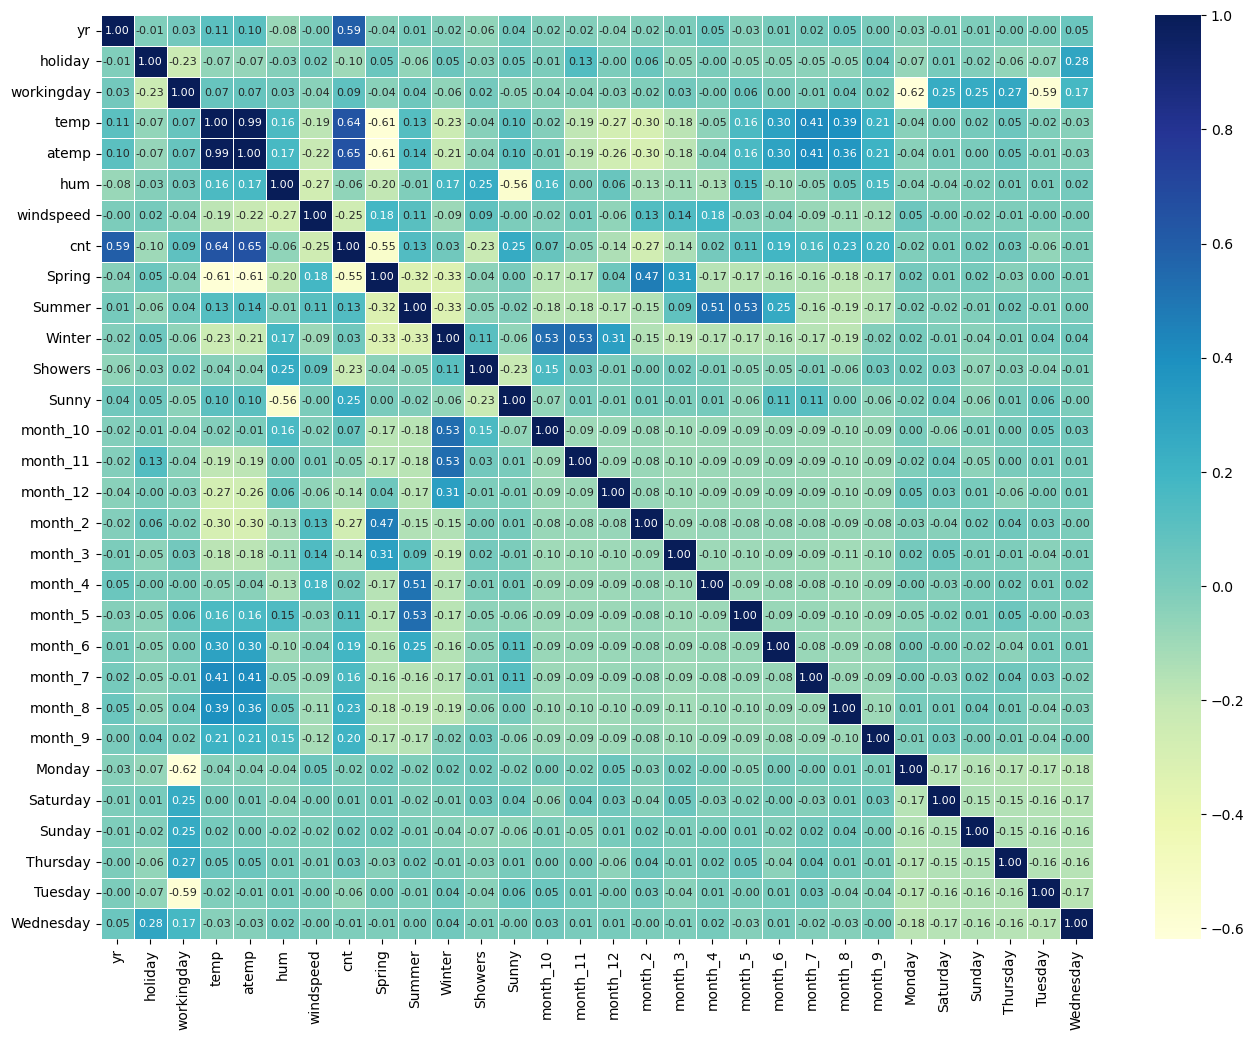

In [30]:
# Check correlation coefficients
plt.figure(figsize = (16, 12))
sns.heatmap(df_boombikes_train.corr(), annot = True,linewidth=.5, fmt=".2f",annot_kws={"size":8}, cmap="YlGnBu")
plt.show()

## Step 5: Rescaling the Features

In [31]:
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_boombikes_train[num_vars] = scaler.fit_transform(df_boombikes_train[num_vars])
df_boombikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,0


In [32]:
df_boombikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.074510,0.076471,0.096078,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.262857,0.266010,0.294988,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and y training sets for the model building

In [33]:
y_train = df_boombikes_train.pop('cnt')
X_train = df_boombikes_train

## Step 6: Building a linear model

A mixed approach to build the model.
using RFE approach for feature selection, followed by statsmodel (based on p-value and vif) approach for building the model

#### RFE (Recursive Feature Elimination)

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
rfe = RFE(lm, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', True, 1),
 ('Showers', True, 1),
 ('Sunny', True, 1),
 ('month_10', False, 2),
 ('month_11', False, 8),
 ('month_12', False, 9),
 ('month_2', False, 5),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 10),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 11),
 ('Sunday', False, 12),
 ('Thursday', False, 7),
 ('Tuesday', True, 1),
 ('Wednesday', False, 6)]

In [37]:
col = X_train.columns[rfe.support_] ## variables suggested by RFE
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_8', 'month_9', 'Monday', 'Tuesday'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_] ## rejected variables

Index(['atemp', 'Summer', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_7', 'Saturday', 'Sunday', 'Thursday', 'Wednesday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

*Common heuristic:*
while VIF > 10 is definitely high; > 5 should not be ignored significance level of 0.05

Guidlines
1. High p-value, high VIF : Remove feature
2. High-low:
    - High p, low VIF: remove these first
    - Low p, high VIF: remove these after the ones above
4. Low p, low VIF : Keep feature

#### Base Model 1 - Selected columns suggested by RFE

In [39]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_8', 'month_9', 'Monday', 'Tuesday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.9
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          6.43e-189
Time:                        17:52:23   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1555      0.030      5.177      0.0

#### Model 2 - Selected columns suggested by RFE - (holiday)

In [40]:
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_8', 'month_9', 'Monday', 'Tuesday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.9
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          6.43e-189
Time:                        17:52:23   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1321      0.045      2.956      0.0

#### Model 3 - Selected columns suggested by RFE - ('holiday', 'Tuesday')

In [41]:
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_8', 'month_9', 'Monday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.87e-189
Time:                        17:52:23   Log-Likelihood:                 517.60
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     493   BIC:                            -929.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1754      0.039      4.547      0.0

#### Model 4 - Selected columns suggested by RFE - ('holiday', 'Tuesday','hum')

In [42]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_8', 'month_9', 'Monday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          3.06e-187
Time:                        17:52:23   Log-Likelihood:                 510.04
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     494   BIC:                            -920.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0729      0.028      2.576      0.0

#### Model 5 - Selected columns suggested by RFE - ('holiday', 'Tuesday','hum', 'windspeed')

In [43]:
cols = ['yr', 'workingday', 'temp', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_8', 'month_9', 'Monday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.17e-180
Time:                        17:52:23   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -953.2
Df Residuals:                     495   BIC:                            -889.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0249      0.028      0.885      0.3

#### Model 6 - Selected columns suggested by RFE - ('holiday', 'Tuesday','hum', 'windspeed', 'month_4')

In [44]:
cols = ['yr', 'workingday', 'temp', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_5',
       'month_6', 'month_8', 'month_9', 'Monday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.4
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.14e-180
Time:                        17:52:23   Log-Likelihood:                 488.26
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     496   BIC:                            -889.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0632      0.024      2.635      0.0

#### Model 7 - Selected columns suggested by RFE - ('holiday', 'Tuesday','hum', 'windspeed', 'month_4', 'month_8')

In [45]:
cols = ['yr', 'workingday', 'temp', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_5',
       'month_6', 'month_9', 'Monday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.6
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          7.93e-181
Time:                        17:52:23   Log-Likelihood:                 486.53
No. Observations:                 510   AIC:                            -947.1
Df Residuals:                     497   BIC:                            -892.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0612      0.024      2.548      0.0

#### Model 8 - Selected columns suggested by RFE - ('holiday', 'Tuesday','hum', 'windspeed', 'month_4', 'month_8','month_6')

In [46]:
cols = ['yr', 'workingday', 'temp', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_3', 'month_5',
       'month_9', 'Monday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.67e-181
Time:                        17:52:23   Log-Likelihood:                 485.34
No. Observations:                 510   AIC:                            -946.7
Df Residuals:                     498   BIC:                            -895.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0615      0.024      2.557      0.0

#### Model 9 - Selected columns suggested by RFE - ('holiday', 'Tuesday','hum', 'windspeed', 'month_4', 'month_8','month_6', 'month_3')

In [47]:
cols = ['yr', 'workingday', 'temp', 'Spring',
       'Winter', 'Showers', 'Sunny', 'month_5',
       'month_9', 'Monday']

build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.18e-181
Time:                        17:52:23   Log-Likelihood:                 482.24
No. Observations:                 510   AIC:                            -942.5
Df Residuals:                     499   BIC:                            -895.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0666      0.024      2.762      0.0

#### Model 10 - Selected columns suggested by RFE - ('holiday', 'Tuesday','hum', 'windspeed', 'month_4', 'month_8','month_6', 'month_3', 'month_5')

In [48]:
cols = ['yr', 'workingday', 'temp', 'Spring',
       'Winter', 'Showers', 'Sunny',
       'month_9', 'Monday']

lm_final, X_train_final, X_train_final_sm = build_model(X_train, y_train, cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.4
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          4.93e-181
Time:                        17:52:23   Log-Likelihood:                 478.53
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     500   BIC:                            -894.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0804      0.024      3.393      0.0

### Comparison between various models 

1. __Base Model 1__: with 18 predictors
    - R-squared: 0.848 and Adjusted R-squared: 0.843
    - AIC: -1003.0 and BIC: -926.7
    - Multicollinearity: Higher VIF for some variables (e.g., hum, temp, workingday)
    - Significane - High p-value for some variables (e.g., holiday)
2. __Model 4__: with 15 predictors, after removing variables having p-value and high VIF, 
    - R-squared: 0.843 and Adjusted R-squared: 0.838
    - AIC: -988.1 and BIC: -920.3
    - Multicollinearity: Higher VIF for temp
    - Significane - All variables are having low p-value

Clearly, between base model and model 4, R-squared decreased with some extent however not much of a gain

Ideally, to reduce multicollinearity, temp variable should have been removed, however we already know that domain wise temp variable is important and posseses

> Considering the business objective, the need is to build model with 
> - fewer predictors
> - multicollinearity better
> - simpler model with fewer variables in a business context
> kept on removing variables.

With this, __*Model 10*__ can be treated as a final model with following key predictors :
- yr: Reflects the yearly trend and is highly significant.
- workingday: Indicates whether the day is a working day, significant for demand fluctuations.
- temp: Temperature, a strong predictor of bike rentals.
- Spring and Winter: Season, significant for seasonal variations.
- Showers: Weather condition, important for understanding how different weather affects demand.
- Sunny: Another weather condition, significant for the model.
- month_9: Month indicators capturing seasonal trends.
- Monday: Day of the week, significant for weekly trends.

## Step 7: Residual Analysis of the train data

Verify  if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)

In [49]:
lm_final.params

const         0.080396
yr            0.234451
workingday    0.056696
temp          0.430549
Spring       -0.116394
Winter        0.057117
Showers      -0.227287
Sunny         0.078770
month_9       0.073232
Monday        0.064160
dtype: float64

In [50]:
y_train_pred = lm_final.predict(X_train_final_sm)

In [51]:
## calculate RMSE
var_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE value is {var_RMSE}')

RMSE value is 0.09468199386082447


### Verifying assumptions

#### Linearity assumption

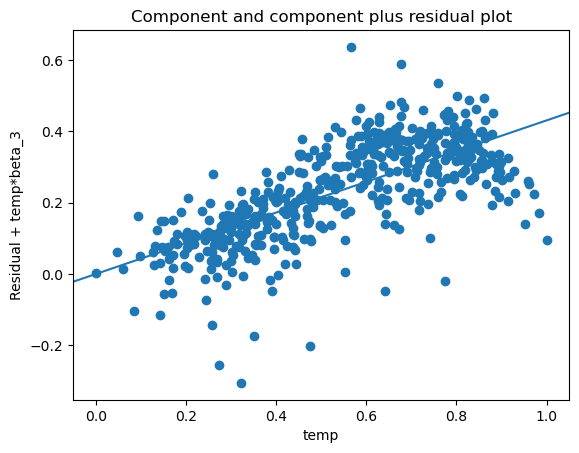

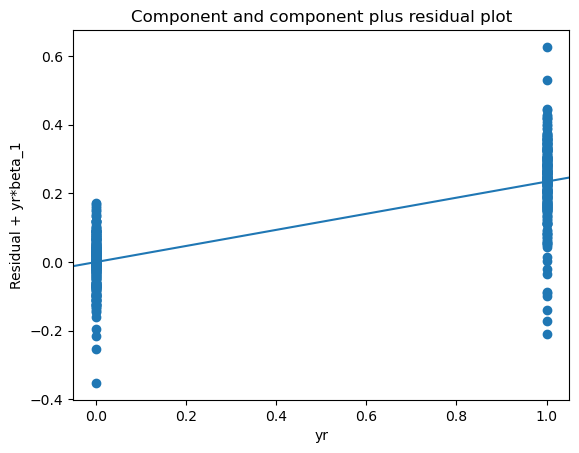

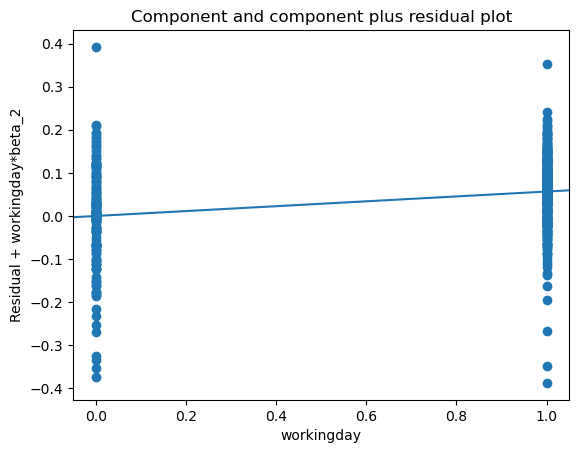

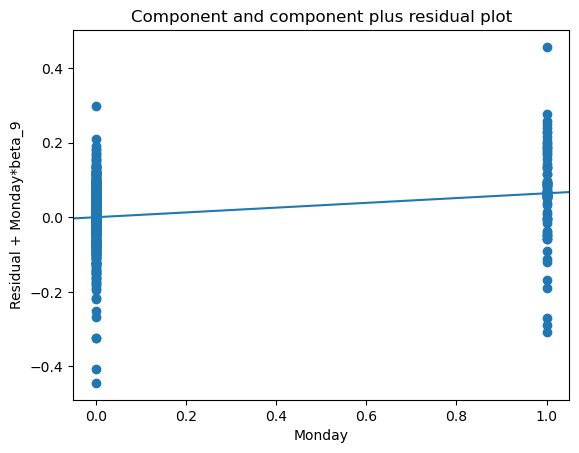

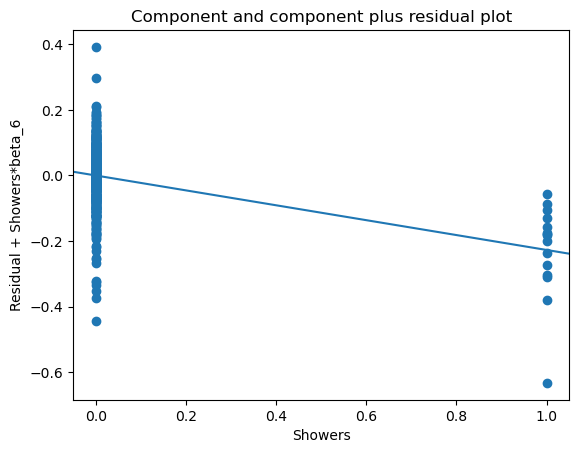

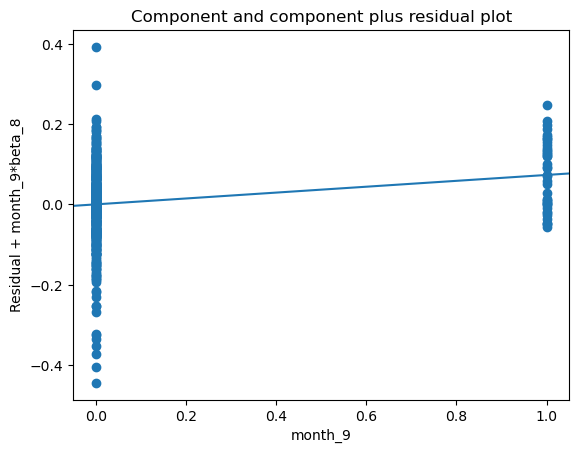

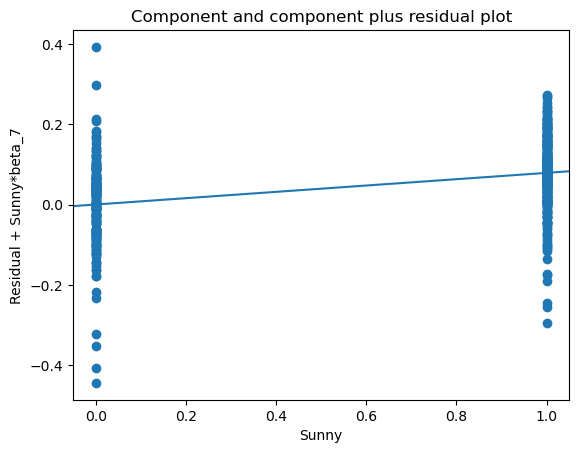

In [52]:
predictors = ['temp', 'yr','workingday', 'Monday', 'Showers', 'month_9', 'Sunny']
for index, item in enumerate(predictors):
    sm.graphics.plot_ccpr(lm_final, item)
    plt.show()

The relationship between the independent variables and the dependent variable is linear

#### Homoscedasticity

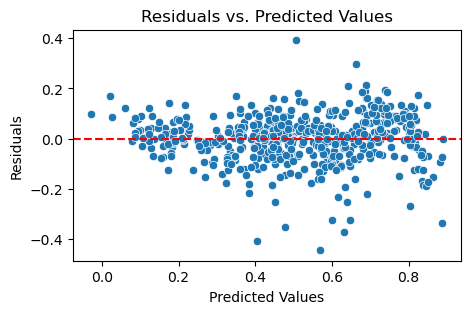

In [53]:
# for validating lieanrity assumption - The relationship between the independent variables and the dependent variable is linear
plt.figure(figsize=(5, 3)) 
sns.scatterplot(x=y_train_pred, y=(y_train - y_train_pred)) 
plt.axhline(0, color='r', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

The residuals have constant variance

#### Normality of Residuals

Text(0.5, 0, 'Errors')

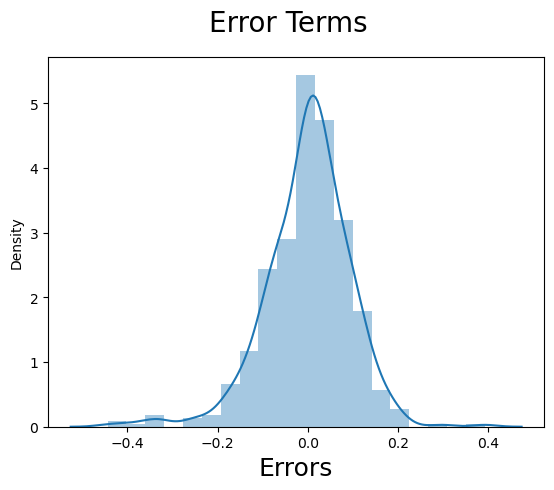

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Above confirms the assumption that the residuals are following the normally distributed with a mean 0.

#### qq-plot verification 

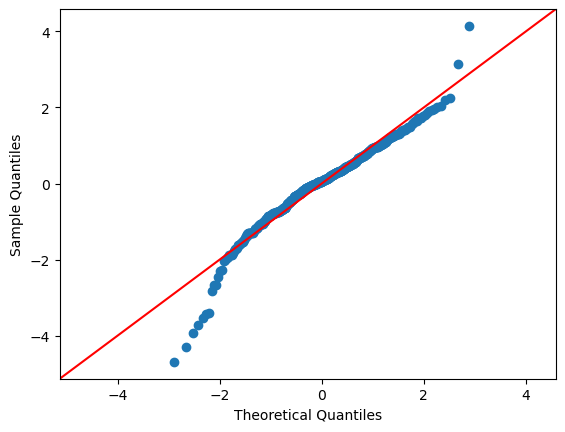

In [55]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Above confirms the assumption that quantiles truly come from normal distributions

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [56]:
df_boombikes_test[num_vars] = scaler.transform(df_boombikes_test[num_vars])

In [57]:
df_boombikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,1,0,0,0,0,0,0,0,0,0
300,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,0
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,1,0,0,0,0,0,0,0
153,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,1,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [58]:
y_test = df_boombikes_test.pop('cnt')
X_test = df_boombikes_test

In [59]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [60]:
# Making predictions
y_test_pred = lm_final.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

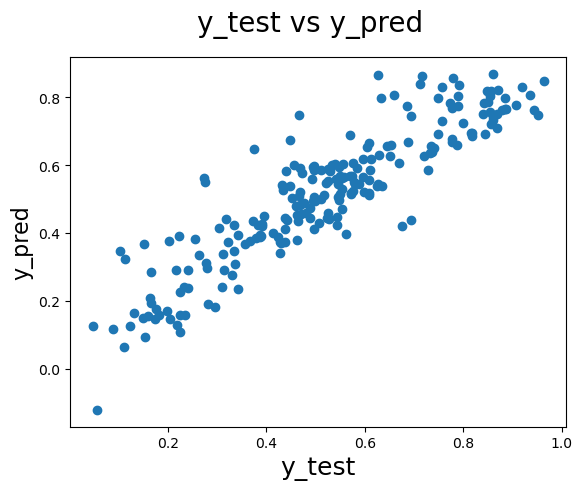

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### R-squared score on the test set

In [62]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09487954208372666

In [63]:
R2 = r2_score(y_test, y_test_pred)

In [64]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)

In [65]:
print(f'r2 score - {round(R2, 3)}')
print(f'adj_R2 - {round(adj_R2, 3)}')

r2 score - 0.81
adj_R2 - 0.799


## Recommendation and Model Summary

Recommendation: Given the business goal, __Model 10__ is more advisable due to the following reasons:
- Interpretability: Model 10 has fewer predictors, making it easier to interpret how each variable affects bike demand. Management can clearly see the impact of each feature and make informed decisions.
- Stability: Model 10 addresses multicollinearity better, resulting in more stable and reliable coefficients. This stability is crucial for management to trust the model's insights and apply them to strategy formulation.
- Simplicity: A simpler model with fewer variables is often preferable in a business context. It reduces the risk of overfitting and makes it easier to communicate findings to stakeholders who may not have a deep technical background.

#### Model coef

Model is:

$ cnt = 0.080396 + 0.234451 \times  yr + 0.056696  \times  workingday + 0.430549 \times temp - 0.116394 \times Spring + 0.057117 \times Winter - 0.227287 \times Showers + 0.078770 \times Sunny + 0.073232 \times month_9 + 0.064160 \times Monday $

#### Model Stats Summary

In [66]:
summary = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[0.822,0.819,0.0946],
                         "Test Set":[0.81,0.799,0.0948]})

summary

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.8220,0.8100
1,Adjusted R-Squared Value,0.8190,0.7990
2,RMSE,0.0946,0.0948
